# Data description

This data set was imported from Kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Attributes:

1. **age**: age of the patient [years]
2. **sex**: sex of the patient [1: Male, 0: Female]
3. **cp**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. **trestbps**: resting blood pressure [mm Hg]
5. **chol**: serum cholesterol [mm/dl]
6. **fbs**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. **restecg**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. **thalach**: maximum heart rate achieved [Numeric value between 60 and 202]
9. **exang**: exercise-induced angina [Y: Yes, N: No]
10. **oldpeak**: oldpeak = ST [Numeric value measured in depression]
11. **slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. **ca**: number of major vessels colored by flourosopy [0-3]
13. **thal**: [0: Normal, 1: fixed defect, 2: reversible defect]
14. **target**: whether the patient has heart disease [1: heart disease, 0: Normal]

# Preparation

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [133]:
# load dataset
df = pd.read_csv("heart.csv")
df['sex'] = pd.Categorical(df.sex)
df['cp'] = pd.Categorical(df.cp)
df['fbs'] = pd.Categorical(df.fbs)
df['restecg'] = pd.Categorical(df.restecg)
df['exang'] = pd.Categorical(df.exang)
df['slope'] = pd.Categorical(df.slope)
df['thal'] = pd.Categorical(df.thal)

# display the first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Exploratory Data Analysis

In [104]:
# check if the dataset contains null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [134]:
# check the type of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   int64   
 1   sex       1025 non-null   category
 2   cp        1025 non-null   category
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   category
 6   restecg   1025 non-null   category
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   category
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   category
 11  ca        1025 non-null   int64   
 12  thal      1025 non-null   category
 13  target    1025 non-null   int64   
dtypes: category(7), float64(1), int64(6)
memory usage: 64.2 KB


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

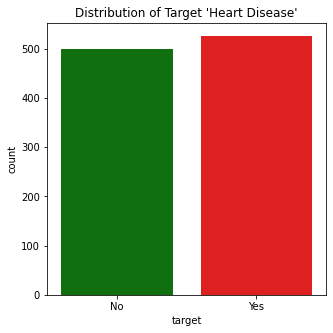

In [106]:
# plot the targets
plt.figure(figsize=(5,5))
heartDisease_countplot = sns.countplot(x=df.target, palette=['green', 'red'])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'])

The number of samples with heart disease is close to the number of samples without heart disease.

Text(0, 0.5, 'Count')

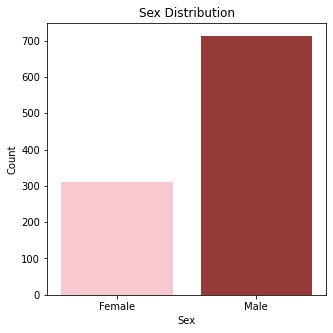

In [107]:
plt.figure(figsize=(5,5))
sex_countplot = sns.countplot(x=df.sex, palette=['pink', 'brown'])
sex_countplot.set_title("Sex Distribution")
sex_countplot.set_xticklabels(['Female', 'Male'])
plt.xlabel('Sex')
plt.ylabel('Count')

There are much more males than females in the data set.

In [108]:
cp_count = df['cp'].value_counts()
cp_type = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'}
cp_count.rename(cp_type, inplace=True)
print(cp_count)

Typical Angina      497
Non-Anginal Pain    284
Atypical Angina     167
Asymptomatic         77
Name: cp, dtype: int64


Text(0.5, 1.0, 'Count of Chest Pain Type')

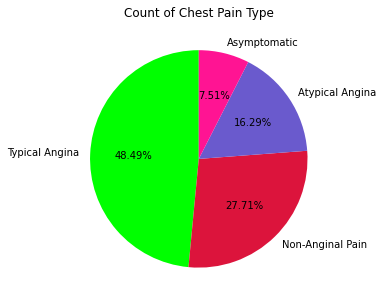

In [109]:
plt.figure(figsize=(5,5))
plt.pie(cp_count, labels=cp_count.index,
        autopct='%1.2f%%', startangle=90, colors= ['lime','crimson', 'slateblue', 'deeppink'])
plt.title("Count of Chest Pain Type")

Typical Angina is the most common chest pain type in the data set.

Text(0, 0.5, 'Frequency')

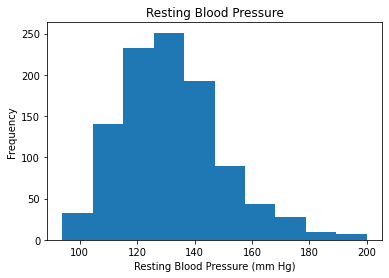

In [110]:
plt.hist(df.trestbps)
plt.title("Resting Blood Pressure")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

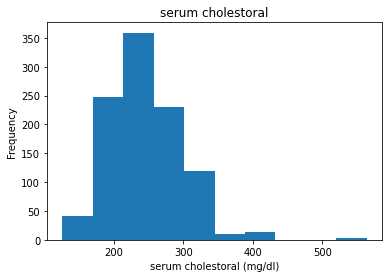

In [111]:
plt.hist(df.chol)
plt.title("serum cholestoral")
plt.xlabel("serum cholestoral (mg/dl)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Count')

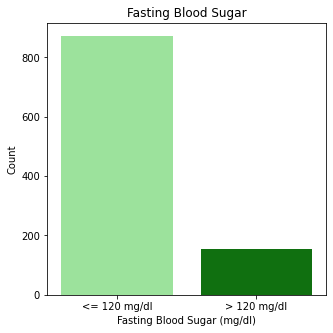

In [112]:
plt.figure(figsize=(5,5))
fbs_countplot = sns.countplot(x=df.fbs, palette=['lightgreen', 'green'])
fbs_countplot.set_title("Fasting Blood Sugar")
fbs_countplot.set_xticklabels(['<= 120 mg/dl', '> 120 mg/dl'])
plt.xlabel('Fasting Blood Sugar (mg/dl)')
plt.ylabel('Count')

In [113]:
restecg_count = df['restecg'].value_counts()
restecg_type = {0: 'Normal', 1: 'ST', 2: 'LVH'}
restecg_count.rename(restecg_type, inplace=True)
print(restecg_count)

ST        513
Normal    497
LVH        15
Name: restecg, dtype: int64


Text(0.5, 1.0, 'Resting Electrocardiographic Results')

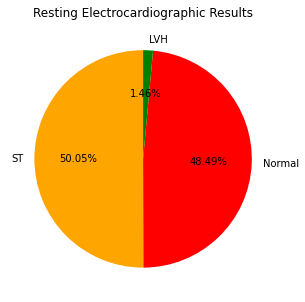

In [114]:
plt.figure(figsize=(5,5))
plt.pie(restecg_count, labels=restecg_count.index,
        autopct='%1.2f%%', startangle=90, colors= ['orange', 'red', 'green'])
plt.title("Resting Electrocardiographic Results")

Resting electrocardiographic is a non-invasive test that can detect abnormalities including arrhythmias,evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks.

Results:
- *Normal*
- *ST*: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- *LVH*: showing probable or definite left ventricular hypertrophy by Estes' criteria

Text(0, 0.5, 'Frequency')

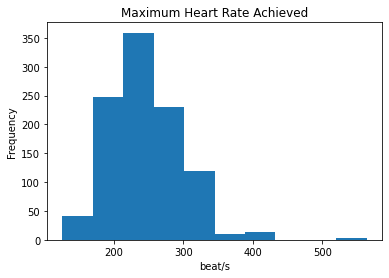

In [115]:
plt.hist(df.chol)
plt.title("Maximum Heart Rate Achieved")
plt.xlabel("beat/s")
plt.ylabel("Frequency")

Text(0, 0.5, 'Count')

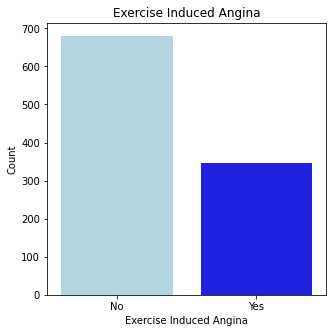

In [116]:
plt.figure(figsize=(5,5))
exang_countplot = sns.countplot(x=df.exang, palette=['lightblue', 'blue'])
exang_countplot.set_title("Exercise Induced Angina")
exang_countplot.set_xticklabels(['No', 'Yes'])
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

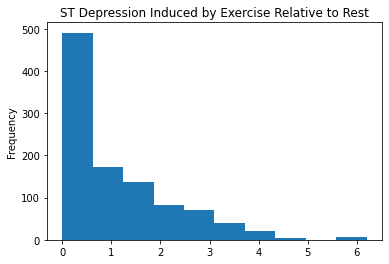

In [117]:
plt.hist(df.oldpeak)
plt.title("ST Depression Induced by Exercise Relative to Rest")
plt.ylabel("Frequency")

In [118]:
slope_count = df['slope'].value_counts()
slope_type = {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'}
slope_count.rename(slope_type, inplace=True)
print(slope_count)

Flat           482
Downsloping    469
Upsloping       74
Name: slope, dtype: int64


Text(0.5, 1.0, 'Slope of the Peak Exercise ST Segment')

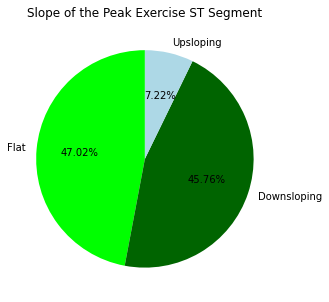

In [119]:
plt.figure(figsize=(5,5))
plt.pie(slope_count, labels=slope_count.index,
        autopct='%1.2f%%', startangle=90, colors= ['lime', 'darkgreen', 'lightblue'])
plt.title("Slope of the Peak Exercise ST Segment")

Text(0, 0.5, 'Count')

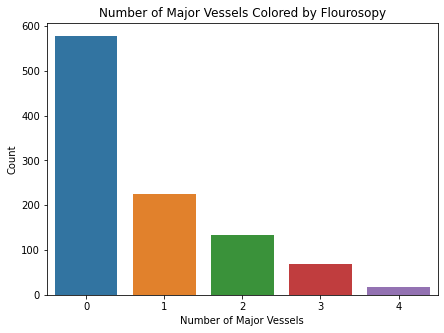

In [120]:
plt.figure(figsize=(7,5))
ca_countplot = sns.countplot(x=df.ca)
ca_countplot.set_title("Number of Major Vessels Colored by Flourosopy")
ca_countplot.set_xticklabels(['0', '1', '2', '3', '4'])
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')

In [121]:
thal_count = df['thal'].value_counts()
thal_type = {0: 'Other', 1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible Defect'}
thal_count.rename(thal_type, inplace=True)
print(thal_count)

Fixed Defect         544
Reversible Defect    410
Normal                64
Other                  7
Name: thal, dtype: int64


Text(0.5, 1.0, 'Defect Condition')

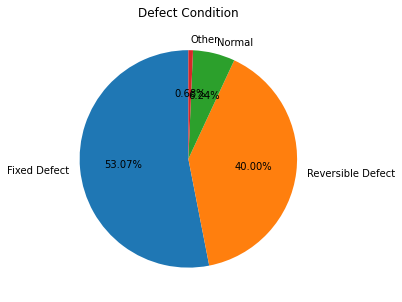

In [122]:
plt.figure(figsize=(5,5))
plt.pie(thal_count, labels=thal_count.index,
        autopct='%1.2f%%', startangle=90)
plt.title("Defect Condition")

In [136]:
Categorical = df.select_dtypes(include=['category'])
Numerical = df.select_dtypes(include=['int64', 'float64'])

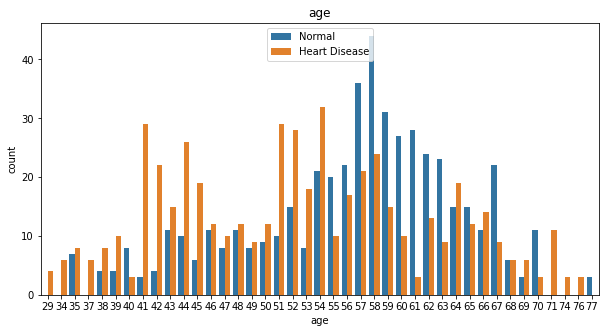

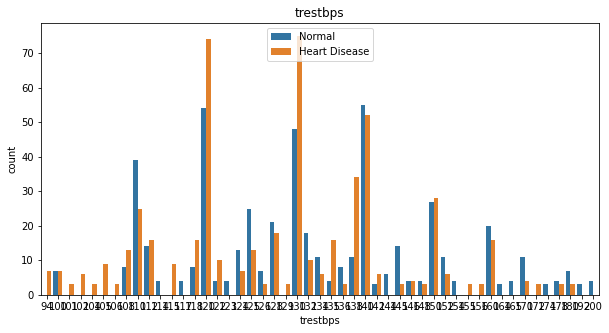

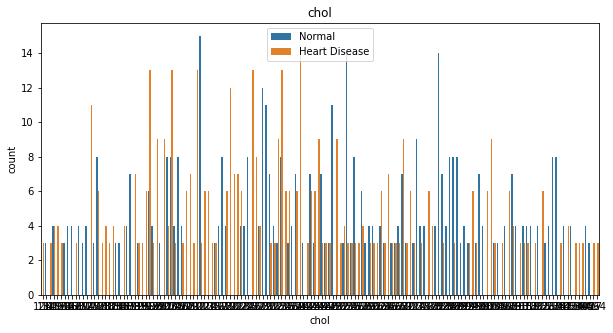

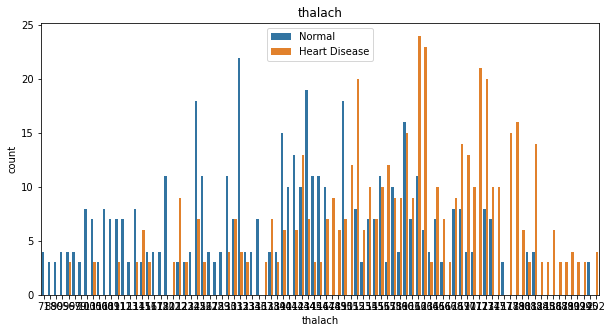

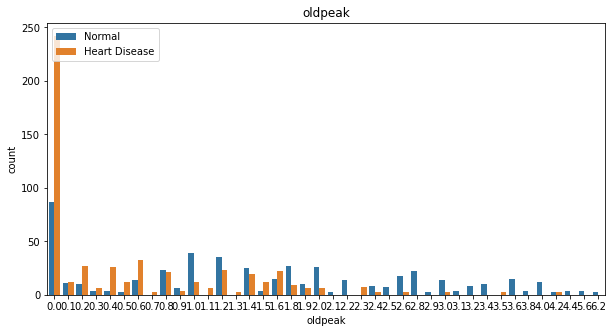

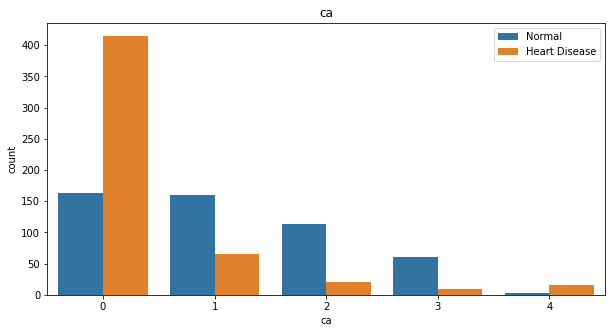

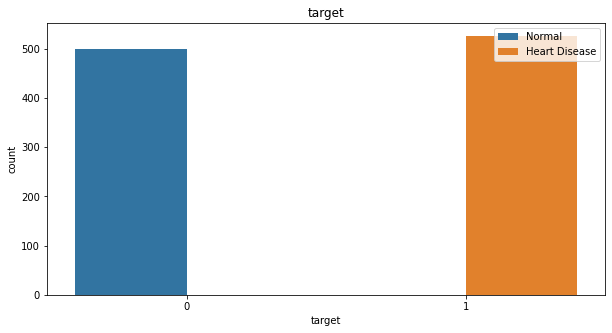

In [124]:
# ploting numerical features with target
for i in Numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='target')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

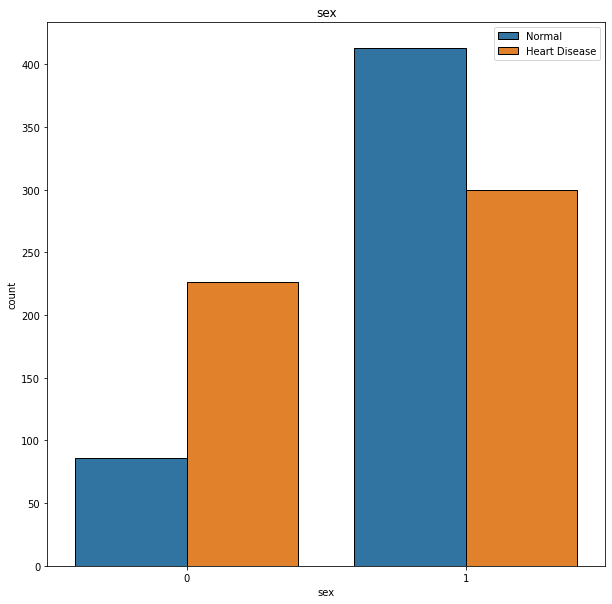

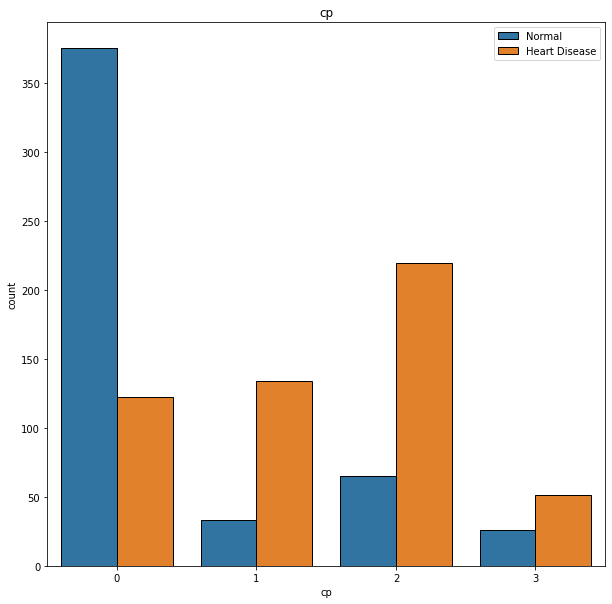

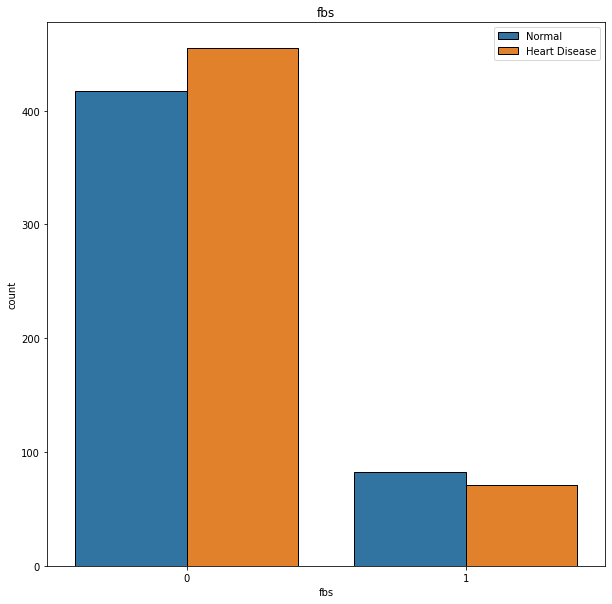

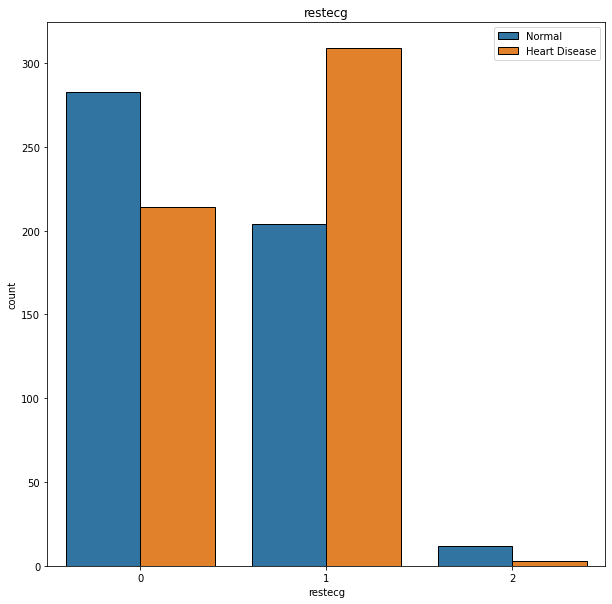

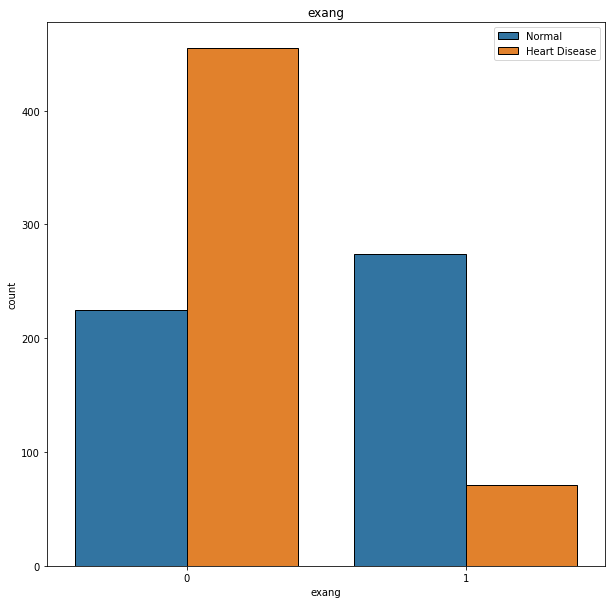

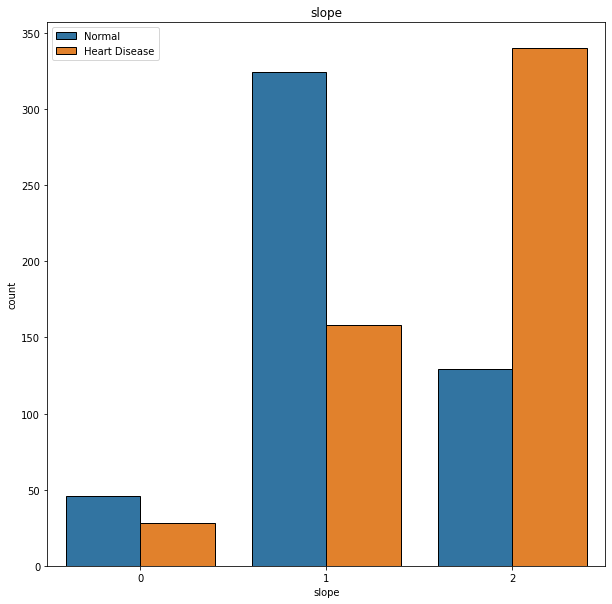

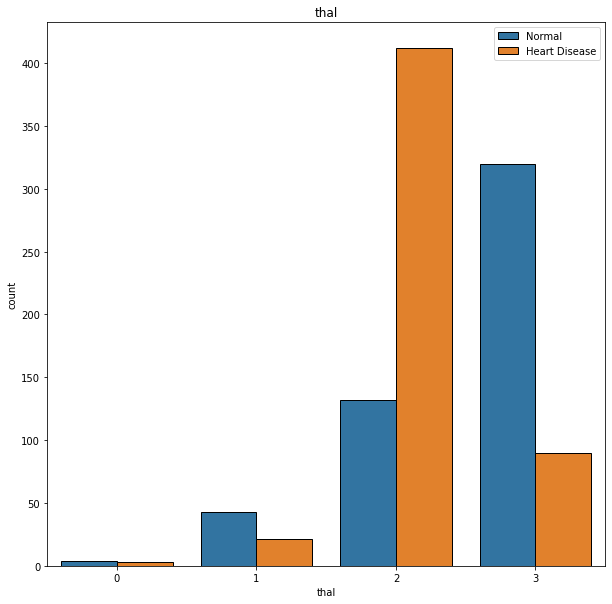

In [137]:
#here we compare betwwen our target and our Categorical features 
for i in Categorical:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, data=df, hue='target', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

# Outliers

<AxesSubplot:>

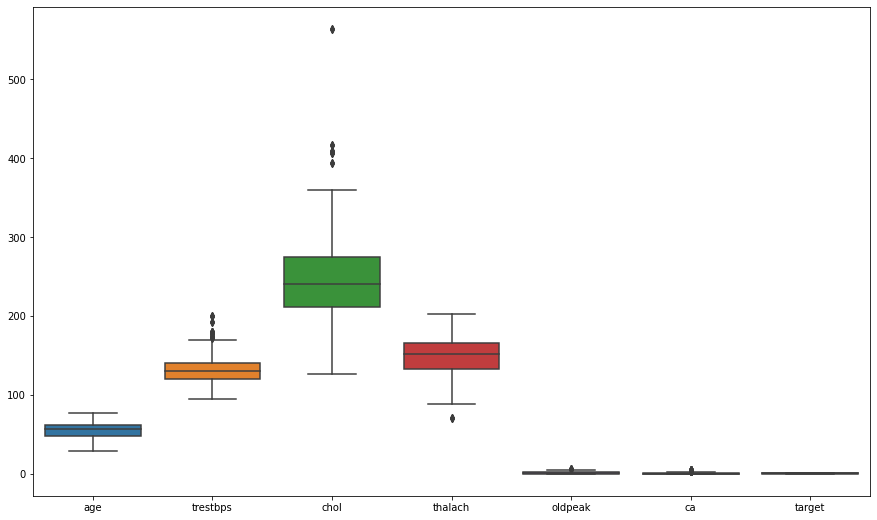

In [138]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df)

There are many outliers in trestbps (resting blood pressure) and chol (serum cholestoral).

In [139]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [141]:
df_num_name = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    print(f"-Check {char} outliers ")
    print('number of outliers: '+ str(len(outliers)))
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check trestbps outliers 
number of outliers: 30
max outlier value: 200
min outlier value: 172

-Check chol outliers 
number of outliers: 16
max outlier value: 564
min outlier value: 394

-Check thalach outliers 
number of outliers: 4
max outlier value: 71
min outlier value: 71

-Check oldpeak outliers 
number of outliers: 7
max outlier value: 6.2
min outlier value: 5.6

-Check ca outliers 
number of outliers: 87
max outlier value: 4
min outlier value: 3



In [163]:
df = df.drop(df[df['chol'] > 500].index) 
#after this we decide to drop this columns 

# Encoding categorical features:

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
sex_le = LabelEncoder()
cp_le = LabelEncoder()
fbs_le = LabelEncoder()
restecg_le = LabelEncoder()
exang_le = LabelEncoder()
slope_le = LabelEncoder()
thal_le = LabelEncoder()

In [164]:
df['sex'] = sex_le.fit_transform(df['sex'])
df['cp'] = cp_le.fit_transform(df['cp'])
df['fbs'] = fbs_le.fit_transform(df['fbs'])
df['restecg'] = restecg_le.fit_transform(df['restecg'])
df['exang'] = exang_le.fit_transform(df['exang'])
df['slope'] = slope_le.fit_transform(df['slope'])
df['thal'] = thal_le.fit_transform(df['thal'])

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1022 non-null   int64  
 1   sex       1022 non-null   int64  
 2   cp        1022 non-null   int64  
 3   trestbps  1022 non-null   int64  
 4   chol      1022 non-null   int64  
 5   fbs       1022 non-null   int64  
 6   restecg   1022 non-null   int64  
 7   thalach   1022 non-null   int64  
 8   exang     1022 non-null   int64  
 9   oldpeak   1022 non-null   float64
 10  slope     1022 non-null   int64  
 11  ca        1022 non-null   int64  
 12  thal      1022 non-null   int64  
 13  target    1022 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 119.8 KB


# Split Data

In [166]:
x = df.drop('target', axis=1)
y = df.target

In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [168]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=x.columns)
X_test = pd.DataFrame(X_test_std, columns=x.columns)

In [169]:
display(X_train.head())
display(X_test.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.037737,-1.519027,0.058953,-0.094826,-0.227354,-0.41960,-1.007012,1.125851,-0.713864,-0.399677,-0.625394,-0.733622,-0.519069
1,1.060428,0.658316,-0.912818,-0.209042,0.368431,-0.41960,0.888322,-1.914898,1.400828,-0.739855,-0.625394,0.236316,1.093358
2,0.066560,0.658316,-0.912818,0.019390,2.217418,-0.41960,0.888322,-0.742038,1.400828,0.110591,-0.625394,0.236316,1.093358
3,0.839569,0.658316,0.058953,-0.209042,-0.761506,2.38322,-1.007012,-0.394524,-0.713864,-0.909945,0.992714,-0.733622,-0.519069
4,-0.264729,0.658316,-0.912818,-0.380366,-0.679329,-0.41960,0.888322,0.821776,-0.713864,-0.059498,0.992714,1.206253,1.093358


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.612577,0.658316,1.030724,0.476254,0.183532,-0.4196,-1.007012,-0.133888,-0.713864,0.790949,-0.625394,2.176191,1.093358
1,0.618709,0.658316,-0.912818,0.476254,0.984760,-0.4196,-1.007012,0.908654,-0.713864,0.110591,-0.625394,1.206253,1.093358
2,0.397850,0.658316,0.058953,-0.380366,-0.514975,-0.4196,0.888322,-0.220767,-0.713864,-0.569766,-0.625394,3.146129,1.093358
3,-1.037737,0.658316,-0.912818,-0.951447,0.306798,-0.4196,-1.007012,1.560243,-0.713864,-0.909945,0.992714,-0.733622,-0.519069
4,-0.043869,0.658316,-0.912818,-1.236987,-0.124633,-0.4196,0.888322,-1.002673,1.400828,1.471306,-0.625394,0.236316,1.093358


# Modeling

## Logistic Regression

In [170]:
lr = LogisticRegression(C = 80)
lr.fit(X_train , y_train)

LogisticRegression(C=80)

In [184]:
print('Logisitic train accuracy:', lr.score(X_train , y_train))

Logisitic train accuracy: 0.8543451652386781


In [185]:
print('Logistic test accuracy:', lr.score(X_test , y_test))

Logistic test accuracy: 0.8292682926829268


In [173]:
lr.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0])

In [176]:
Y_pred = lr.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
550,0,0
441,0,0
521,1,0
721,1,1
791,0,0
869,1,1
373,0,0
790,0,0
565,1,1
657,1,1


## KNN

In [177]:
knn = KNeighborsClassifier(n_neighbors=10)

In [178]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=10)

In [181]:
print('KNN train accuracy:', knn.score(X_train , y_train))

KNN train accuracy: 0.8886168910648715


In [182]:
print('KNN test accuracy:', knn.score(X_test , y_test))

KNN test accuracy: 0.8439024390243902


## Decision Tree

In [190]:
dt = DecisionTreeClassifier(max_features=9, max_depth=4)

In [191]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4, max_features=9)

In [192]:
print('Decision tree train accuracy:', dt.score(X_train , y_train))

Decision tree train accuracy: 0.8678090575275398


In [193]:
print('Decision tree test accuracy:', dt.score(X_test , y_test))

Decision tree test accuracy: 0.8829268292682927


[Text(0.5267857142857143, 0.9, 'x[2] <= -0.427\ngini = 0.499\nsamples = 817\nvalue = [392, 425]'),
 Text(0.2857142857142857, 0.7, 'x[11] <= -0.249\ngini = 0.375\nsamples = 392\nvalue = [294, 98]'),
 Text(0.14285714285714285, 0.5, 'x[7] <= -0.09\ngini = 0.5\nsamples = 174\nvalue = [89, 85]'),
 Text(0.07142857142857142, 0.3, 'x[9] <= -0.315\ngini = 0.394\nsamples = 89\nvalue = [65, 24]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.216\nsamples = 65\nvalue = [57, 8]'),
 Text(0.21428571428571427, 0.3, 'x[12] <= 0.287\ngini = 0.405\nsamples = 85\nvalue = [24, 61]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.271\nsamples = 62\nvalue = [10, 52]'),
 Text(0.25, 0.1, 'gini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(0.42857142857142855, 0.5, 'x[3] <= -1.294\ngini = 0.112\nsamples = 218\nvalue = [205, 13]'),
 Text(0.35714285714285715, 0.3, 'x[4] <= -0.238\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.321428

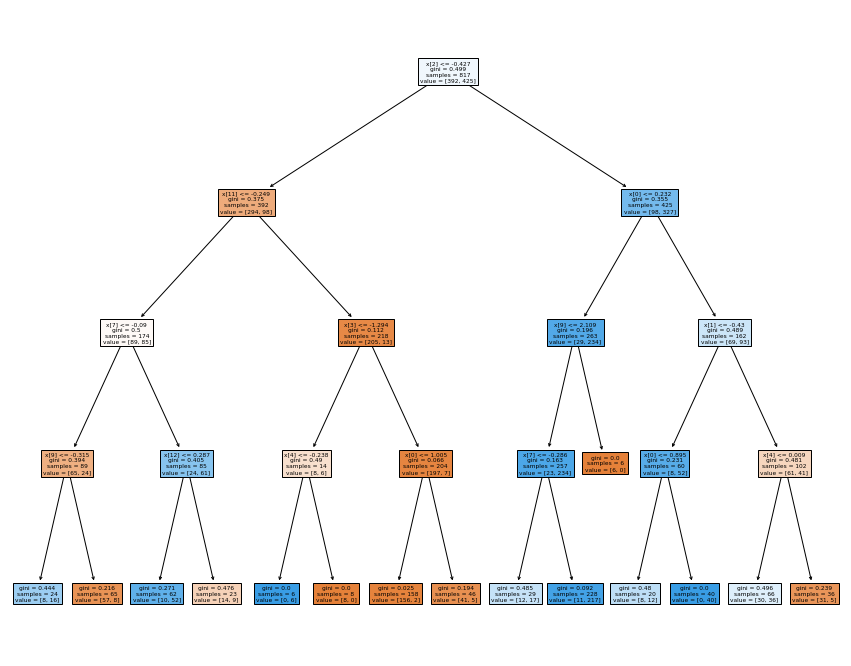

In [194]:
from sklearn import tree
fig = plt.figure(figsize = (15,12))
tree.plot_tree(dt , filled= True)

In [195]:
Y_pred = dt.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
550,0,0
441,0,0
521,1,1
721,1,1
791,0,0
869,1,1
373,0,0
790,0,0
565,1,1
657,1,1


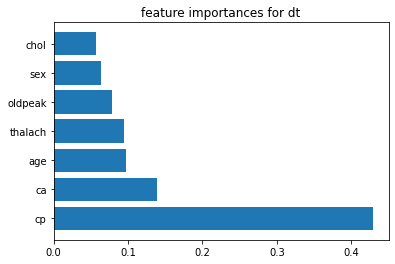

In [196]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for dt')
    plt.show()

features_names = list(df.columns)
f_importances(abs(dt.feature_importances_), features_names, top=7)

In [197]:
#Classification Report#:it seems it is very good 
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       107
           1       0.86      0.91      0.88        98

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



## Random Forest

In [198]:
rf = RandomForestClassifier(max_features=7, max_depth=3)

In [206]:
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=3, max_features=7)

In [207]:
print('Random forest train accuracy:', rf.score(X_train , y_train))

Random forest train accuracy: 0.8812729498164015


In [208]:
print('Random forest test accuracy:', rf.score(X_test , y_test))

Random forest test accuracy: 0.848780487804878


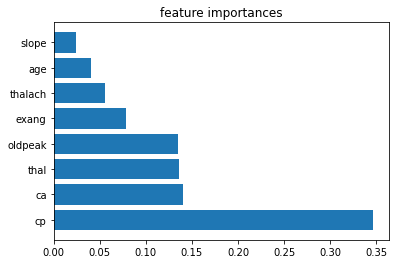

In [209]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = list(df.columns)
f_importances(abs(rf.feature_importances_), features_names, top=8)

In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
Accuracy, Precision, Recall, F1= {}, {}, {}, {}
models = {}
models['Logistic Regression'] = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=6, algorithm='kd_tree', metric='manhattan')
models['Decision Trees'] = DecisionTreeClassifier(criterion='gini', max_depth=4)
models['Random Forest'] = RandomForestClassifier(n_estimators = 85, min_samples_split= 8, min_samples_leaf= 3, max_features= 'auto',
                                      max_depth= 50, bootstrap= True, random_state=125)

In [211]:
for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    Accuracy[key] = accuracy_score(predictions, y_test)
    Precision[key] = precision_score(predictions, y_test)
    Recall[key] = recall_score(predictions, y_test)
    F1[key] = f1_score(predictions, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [212]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = Accuracy.values()
df_model['Precision'] = Precision.values()
df_model['Recall'] = Recall.values()
df_model['F1 Score'] = F1.values()
df_model.sort_values

<bound method DataFrame.sort_values of                      Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.829268   0.816327  0.824742  0.820513
K-Nearest Neighbor   0.853659   0.775510  0.904762  0.835165
Decision Trees       0.863415   0.887755  0.836538  0.861386
Random Forest        0.951220   0.908163  0.988889  0.946809>

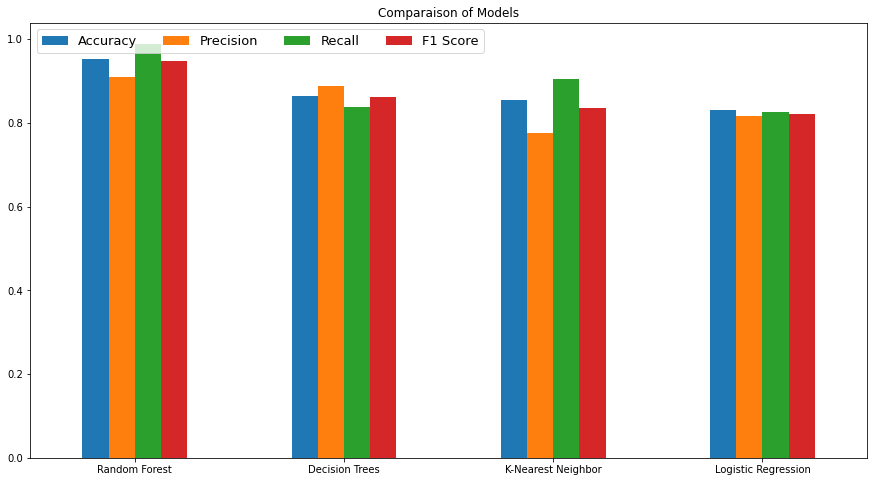

In [213]:
plt.rcParams["figure.figsize"] = (15,8)
ax = df_model.sort_values(by='Accuracy',ascending=False).plot.bar(rot=0)
ax.title.set_text('Comparaison of Models')
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='upper left',prop={'size': 13})

In this experiments, random forest has the highest accuracy.

## XGBoost

In [214]:
from xgboost import XGBClassifier

In [215]:
xgb = XGBClassifier(max_depth = 7 , learning_rate = 0.25 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [216]:
xgb.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [217]:
print('XGBoost train accuracy:', xgb.score(X_train , y_train))

XGBoost train accuracy: 0.988984088127295


In [218]:
print('XGBoost test accuracy:', xgb.score(X_test , y_test))

XGBoost test accuracy: 0.9658536585365853


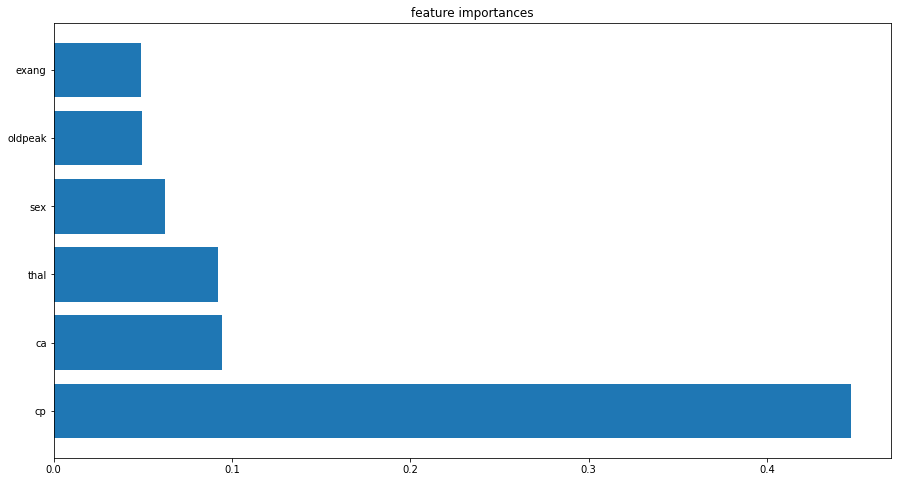

In [219]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = list(df.columns)
f_importances(abs(xgb.feature_importances_), features_names, top=6)


## Adaboost

In [221]:
from sklearn.ensemble import AdaBoostClassifier

In [222]:
ada = AdaBoostClassifier(n_estimators=3, learning_rate=0.2)

In [228]:
ada.fit(X_train , y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=3)

In [229]:
print('Adaboost train accuracy:', ada.score(X_train , y_train))

Adaboost train accuracy: 0.824969400244798


In [230]:
print('Adaboost test accuracy:', ada.score(X_test , y_test))

Adaboost test accuracy: 0.8731707317073171


## Ensemble Voting

In [237]:
clf2 = KNeighborsClassifier(n_neighbors=4)
clf3 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
clf4 = RandomForestClassifier(n_estimators=3 , max_depth=6  , max_features=4)

In [239]:
v_clf = VotingClassifier(estimators=[('KNeighborsClassifier' , clf2), ("XGBClassifier" , clf3), 
                                     ("RandomForestClassifier" , clf4)] , voting = "hard")

In [240]:
v_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=4)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_po...
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=5, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=4,
                                                     n_estimators=3))])

In [241]:
print('Ensemble voting train accuracy:', v_clf.score(X_train , y_train))

Ensemble voting train accuracy: 0.981640146878825


In [242]:
print('Ensemble voting test accuracy:', v_clf.score(X_test , y_test))

Ensemble voting test accuracy: 0.926829268292683


## Light GBM

In [244]:
from sklearn.metrics import roc_auc_score
lgbm_clf = LGBMClassifier(n_estimators=500)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=500, eval_metric="auc", eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')

[1]	valid_0's binary_logloss: 0.629367	valid_0's auc: 0.967099
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's binary_logloss: 0.577726	valid_0's auc: 0.969245
[3]	valid_0's binary_logloss: 0.532885	valid_0's auc: 0.973155
[4]	valid_0's binary_logloss: 0.498033	valid_0's auc: 0.97139
[5]	valid_0's binary_logloss: 0.46191	valid_0's auc: 0.971724
[6]	valid_0's binary_logloss: 0.436824	valid_0's auc: 0.973298
[7]	valid_0's binary_logloss: 0.410291	valid_0's auc: 0.974347
[8]	valid_0's binary_logloss: 0.389107	valid_0's auc: 0.97573
[9]	valid_0's binary_logloss: 0.369844	valid_0's auc: 0.976063
[10]	valid_0's binary_logloss: 0.348428	valid_0's auc: 0.977446
[11]	valid_0's binary_logloss: 0.332129	valid_0's auc: 0.979926
[12]	valid_0's binary_logloss: 0.314851	valid_0's auc: 0.982024
[13]	valid_0's binary_logloss: 0.301462	valid_0's auc: 0.983168
[14]	valid_0's binary_logloss: 0.288902	valid_0's auc: 0.982834
[15]	valid_0's binary_logloss: 0.277126	valid_0's auc

In [247]:
print('Light GBM train accuracy:', lgbm_clf.score(X_train, y_train))

Light GBM train accuracy: 1.0


In [248]:
print('Light GBM test accuracy:', lgbm_clf.score(X_test, y_test))

Light GBM test accuracy: 1.0


## CatBoost

In [249]:
catboost = CatBoostClassifier(iterations=107)
catboost.fit(X_train, y_train)

Learning rate set to 0.073368
0:	learn: 0.6634420	total: 48.1ms	remaining: 5.1s
1:	learn: 0.6341236	total: 48.8ms	remaining: 2.56s
2:	learn: 0.6093881	total: 50ms	remaining: 1.73s
3:	learn: 0.5854899	total: 51.1ms	remaining: 1.32s
4:	learn: 0.5648112	total: 52.5ms	remaining: 1.07s
5:	learn: 0.5440282	total: 53.7ms	remaining: 904ms
6:	learn: 0.5257444	total: 54.7ms	remaining: 782ms
7:	learn: 0.5095967	total: 55.8ms	remaining: 690ms
8:	learn: 0.4960541	total: 56.8ms	remaining: 619ms
9:	learn: 0.4823456	total: 57.9ms	remaining: 561ms
10:	learn: 0.4707694	total: 58.8ms	remaining: 513ms
11:	learn: 0.4580516	total: 59.9ms	remaining: 474ms
12:	learn: 0.4466886	total: 60.8ms	remaining: 440ms
13:	learn: 0.4353934	total: 61.7ms	remaining: 410ms
14:	learn: 0.4238455	total: 62.7ms	remaining: 384ms
15:	learn: 0.4132857	total: 63.7ms	remaining: 362ms
16:	learn: 0.4053418	total: 64.6ms	remaining: 342ms
17:	learn: 0.3963226	total: 65.7ms	remaining: 325ms
18:	learn: 0.3894517	total: 66.6ms	remaining: 3

In [251]:
y_pred = catboost.predict(X_test)

In [254]:
print('CatBoost train accuracy:', catboost.score(X_train, y_train))

CatBoost train accuracy: 0.9828641370869033


In [255]:
print('CatBoost test accuracy:', catboost.score(X_test, y_test))

CatBoost test accuracy: 0.9365853658536586


In [256]:
print('Classification report\n', classification_report(y_test, y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       107
           1       0.96      0.91      0.93        98

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

